In [24]:
#простой многослойный персептрон с одним скрытым слоем
import platform 
print(platform.python_version())
import numpy
import tensorflow as tf
print(tf.__version__)

3.9.7
2.7.0


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [26]:
# Set random seed for purposes of reproducibility
seed = 21
numpy.random.seed(seed)

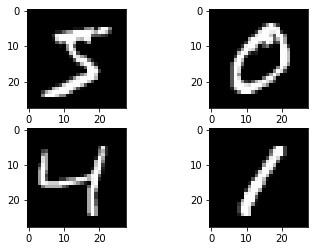

In [27]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
#show the plot
plt.show()

In [28]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [29]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [30]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [37]:
# define baseline model
#простая нейронная сеть с одним скрытым слоем с тем же количеством нейронов, что и у входов (784). 
#функция relu использется в скрытом слое, а функция активации softmax используется в выходном слое
#для преобразования выходных значений в вероятностные значения и позволяет выбрать один класс из 10 
#категориальная_кроссэнтропия используется в качестве функции ошибки
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
	return model

In [38]:
batch_size = 100
epochs = 10
model = baseline_model()
model_history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 2.2108 - accuracy: 0.2572 - val_loss: 2.0825 - val_accuracy: 0.3510
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 1.9887 - accuracy: 0.4326 - val_loss: 1.8747 - val_accuracy: 0.5408
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 1.7991 - accuracy: 0.5903 - val_loss: 1.6952 - val_accuracy: 0.6595
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 1.6344 - accuracy: 0.6759 - val_loss: 1.5391 - val_accuracy: 0.7205
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 1.4903 - accuracy: 0.7201 - val_loss: 1.4022 - val_accuracy: 0.7543
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 1.3636 - accuracy: 0.7485 - val_loss: 1.2826 - val_accuracy: 0.7772
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 1.2533 - accuracy: 0.7699 - val_loss: 1.1791 - val_accuracy: 0.7933
Epoch 

In [39]:
# Model evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.947665810585022
Test accuracy: 0.8240000009536743


In [40]:
from matplotlib import pyplot as plt

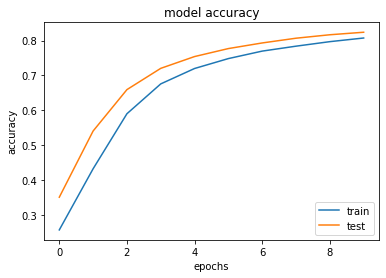

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test' ], loc = 'lower right')
plt.show
plt.savefig('ac_mlp_100_30_adam.png')